In [1]:
import gzip
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora, models, similarities
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel
import pickle

In [2]:
asins = dict()
categories = dict()
reviewtextlist = list()
review_categories = list()

In [3]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l)

In [4]:
## Read categories,asins for a specific category and keep in a dictionary
def readMetaData(path,catname):
    i = 0
    for d in parse(path):
        numCategories=0
        title= "Not available"
        if 'title' in d:
            title=d['title']

        if(len(d['categories']) > 0):
            numCategories = len(d['categories'][0])
            for i in  range(0,numCategories):
                cat = d['categories'][0][i]
                if cat not in categories:
                    categories[cat]=cat
                    review_categories.append(cat)
                if cat == catname:
                    asins[d['asin']] = title
        i += 1

In [5]:
def readReviewdata(path):
    with gzip.open(path, "rb") as f:
        for line in f:
            d = eval(line)
            reviewerId = d['reviewerID']
            asin = d['asin']
            rating = d['overall']
            summary = d['summary']
            reviewText = d['reviewText']
            dtime = d['reviewTime']
            if asin in asins and len (reviewText)>0:
                reviewtextlist.append(reviewText)

In [6]:
def clean(doc):
    lemma = WordNetLemmatizer()
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords.words('english')])
    punc_free = ''.join(ch for ch in stop_free if ch not in string.punctuation)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [7]:
def main():
    readMetaData('meta_Cell_Phones_and_Accessories.json.gz',"Headsets")
    readReviewdata('reviews_Cell_Phones_and_Accessories.json.gz')
    reviewId = 0
    reviewtextlist_capped = reviewtextlist[0:10000]
    for ll in reviewtextlist_capped:
        reviewId +=1

    doc_clean = [clean(reviewText).split() for reviewText in reviewtextlist_capped]
    dictionary = corpora.Dictionary(doc_clean)
    corpus = [dictionary.doc2bow(doc) for doc in doc_clean]
    tfidf = TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]

    n_topics = 10
    #lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=n_topics)
    lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=n_topics, passes=100)
    pickle.dump(lda.print_topics(num_topics=10, num_words=15),open("headsets_topics_10000.p","wb"))
   
    for i in range(0, n_topics):
        temp = lda.show_topic(i, 15)
        terms = []
        for term in temp:
            terms.append(term)
        print "Top 15 terms for topic #" + str(i) + ": "+ ", ".join([i[0] for i in terms])
    

    # document-topic distribution
    for doc in corpus:
        temp = lda.get_document_topics(doc)
    # returns a list of (topic_id, topic_probability) 2-tuples.

    # topic-word distribution
    for i in range(0, n_topics):
        temp = lda.get_topic_terms(i, 15)
    # returns a list of (word_id, probability) 2-tuples for the topn most probable words in topic topicid.


In [8]:
if __name__ == "__main__":
    main()

Top 15 terms for topic #0: loses, alert, speed, mono, mother, crackle, ipaq, miniusb, ridiculous, hp, e, rock, packed, de, transmit
Top 15 terms for topic #1: bluetooths, command, freedom, greatest, sleek, worry, refurbished, packaged, dy, special, bt, hears, understanding, vibrate, stupid
Top 15 terms for topic #2: palm, reset, aaa, dongle, die, doa, smartphone, doubt, reccomend, installed, clicking, 70, satisfactory, headsetthe, risk
Top 15 terms for topic #3: worn, shure, tunnel, ft, recommendation, pressure, rechargeable, significant, needle, program, preference, researched, effective, beginning, passed
Top 15 terms for topic #4: scala, cardo, sync, 500, mainly, reduction, vendor, sunglass, highest, highway, enjoyed, flawlessly, 45, ipod, mini
Top 15 terms for topic #5: voyager, razr, bt, handset, ease, truck, manual, stereo, retail, laptop, super, beep, tested, bulk, whole
Top 15 terms for topic #6: tool, delivers, 13, california, locate, reccommend, cisco, appeared, advertized, s

In [16]:
import dill

readMetaData('meta_Cell_Phones_and_Accessories.json.gz',"Headsets")
readReviewdata('reviews_Cell_Phones_and_Accessories.json.gz')
reviewId = 0
reviewtextlist_capped = reviewtextlist[0:10000]
for ll in reviewtextlist_capped:
    reviewId +=1

doc_clean = [clean(reviewText).split() for reviewText in reviewtextlist_capped]
dictionary = corpora.Dictionary(doc_clean)
dill.dump(dictionary, open('dictionary_10000.dill', 'w'))
pickle.dump(dictionary,open("dic_10000.p","wb"))


corpus = [dictionary.doc2bow(doc) for doc in doc_clean]
dill.dump(corpus, open('corpus_10000.dill', 'w'))
pickle.dump(corpus,open("corpus_10000.p","wb"))

In [ ]:
corpus = dill.load(open('corpus_10000.dill', 'r'))
dictionary = dill.load(open('dictionary_10000.dill', 'r'))
model = LdaModel.load('headsets_10000.lda')

In [9]:
model = LdaModel.load('headsets_10000.lda')
corpus = pickle.load(open("corpus_10000.p","rb"))
dictionary = pickle.load(open("dic_10000.p","rb"))
id2word = gensim.corpora.Dictionary()

In [10]:
lda_topics = pickle.load(open("headsets_topics_from_10000.p", "rb"))

In [12]:
print lda_topics[4]
print '\n'
print lda_topics[6]
print '\n'
print lda_topics[9]

(4, u'0.079*ear + 0.024*fit + 0.014*piece + 0.013*sound + 0.012*it + 0.012*like + 0.011*earpiece + 0.011*good + 0.010*headset + 0.010*one + 0.008*quality + 0.008*get + 0.007*well + 0.007*comfortable + 0.007*little')


(6, u'0.030*hear + 0.029*headset + 0.016*noise + 0.014*volume + 0.014*it + 0.013*sound + 0.013*people + 0.009*end + 0.009*could + 0.008*im + 0.008*well + 0.008*one + 0.008*quality + 0.007*person + 0.007*even')


(9, u'0.038*product + 0.024*work + 0.024*item + 0.020*amazon + 0.013*return + 0.012*received + 0.012*would + 0.011*shipping + 0.011*service + 0.011*money + 0.011*customer + 0.010*ordered + 0.009*back + 0.009*get + 0.008*buy')


In [13]:
query = "sound quality"
#query = "ear"
query = query.split()
query

['sound', 'quality']

In [14]:
token2id = gensim.corpora.Dictionary()
_ = token2id.merge_with(dictionary.token2id)
query = dictionary.doc2bow(query)

In [15]:
model[query]

[(0, 0.033333333337205159),
 (1, 0.033337305511763123),
 (2, 0.033333333336457278),
 (3, 0.033333333336766829),
 (4, 0.033341147008104075),
 (5, 0.69998778916209259),
 (6, 0.033333333336210615),
 (7, 0.033333333335902639),
 (8, 0.033333758299543222),
 (9, 0.033333333335954431)]

In [16]:
a = list(sorted(model[query], key=lambda x: x[1]))
print(a[0])
print(a[-1])

(7, 0.033333333335902458)
(5, 0.6999878811580591)


In [17]:
model.print_topic(a[-1][0]) #most related

u'0.034*headset + 0.021*it + 0.019*great + 0.018*sound + 0.017*one + 0.016*hear + 0.014*work + 0.014*good + 0.013*quality + 0.013*bluetooth'

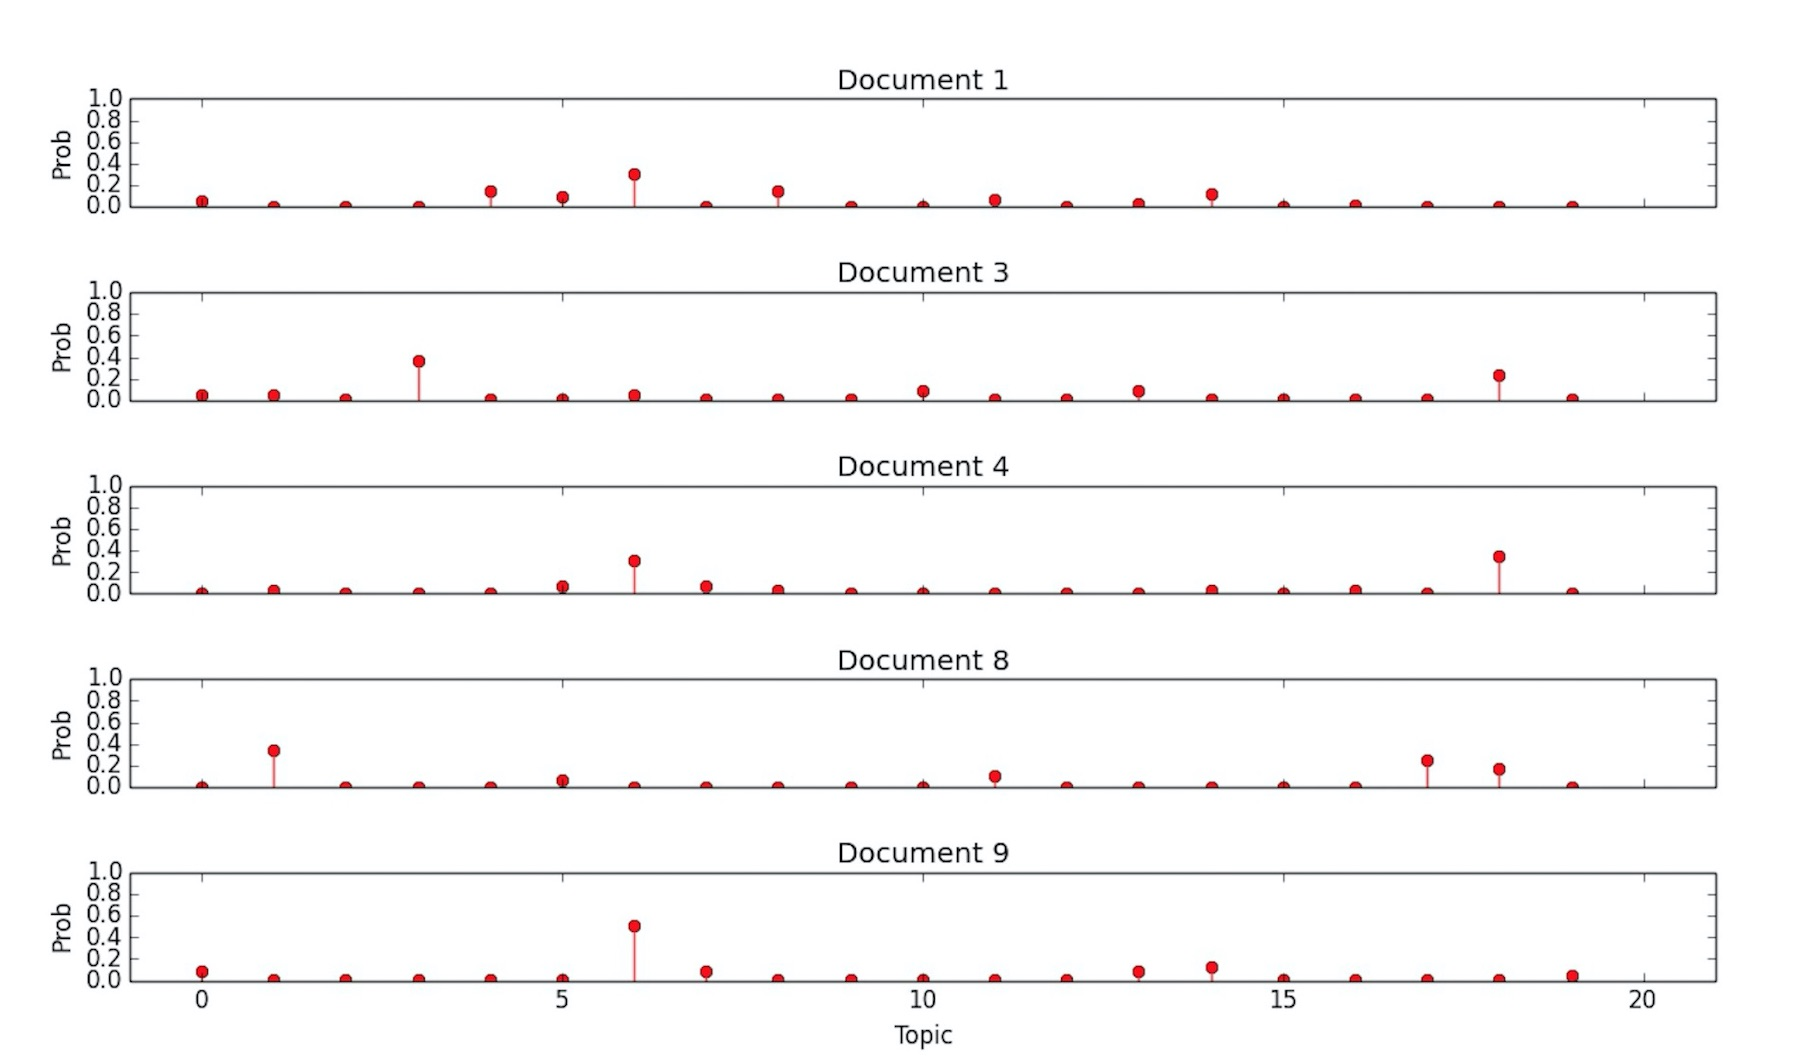

In [52]:
from IPython.display import Image, display
listOfImageNames = ['doctopic.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [20]:
reviews = pickle.load(open("reviews_10000.p","rb"))

In [19]:
from __future__ import unicode_literals
import spacy
from spacy.en import English
import re

reviews = pickle.load(open("reviews_10000.p","rb"))
doc = reviews[0:9]
sound_sents = []
for item in doc:
    document = unicode(str(item), encoding='utf-8')
    parser = English()
    parsed_doc = parser(document)
    sound = [sent for sent in parsed_doc.sents
                       if 'sound' in sent.string.lower()]
    sound_sents += sound
print sound_sents

[Nice sound and others can hear you easily, but the unit does not stay in your ear., great sound n hearing kinda delayd in the mic not sure if thats the network or headset but its a great buy weve been rocking it out]
